In [ ]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

path_data = 'MyDrive/Colab Notebooks/data/DataMiningProject/Preprocessed/'
path_mount = '/content/drive/'

In [ ]:
from google.colab import drive
drive.mount(path_mount)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Paziente S3 - dati unbalanced (88% vs 12%)

## Definizione dei Dataset

In [ ]:
subject = "S3"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")
df.head()

,epoch,condition,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8
0,0,0,"[0.0885443721, 0.2320398021, 0.3372971247, 0.3...","[-0.1805032051, -0.1435239163, -0.1041987137, ...","[-0.200020404, -0.1363438237, -0.0994958291, -...","[0.0170487279, -0.0259283698, -0.0667068495, -...","[-0.1273663549, -0.1358088362, -0.1468045911, ...","[0.5432482536000001, 0.4822975169, 0.409832962...","[-0.3029450057, -0.3642638775, -0.4212514855, ...","[0.16199361610000002, 0.0915315045, 0.09132738..."
1,1,0,"[0.5289763019, 0.6975086458, 0.813976209800000...","[-0.1316532343, -0.1860430454, -0.204136858, -...","[0.06523960420000001, 0.1519068133, 0.26517465...","[-0.0176803684, 0.08653842590000001, 0.1573916...","[-0.0585735475, -0.057598266, -0.0489822230000...","[0.0680580043, -0.0338681459, -0.1243801525000...","[-0.0950373018, -0.1822418005, -0.261862245, -...","[-0.3593294583, -0.4762026272, -0.597181075100..."
2,2,0,"[0.1758614538, 0.1675654543, 0.191817450200000...","[-0.2339067379, -0.16001820690000002, -0.13445...","[-0.4508580968, -0.5559805056, -0.6621267668, ...","[-0.1630449613, -0.11112301120000001, -0.03503...","[-0.18851384910000002, -0.23566179999999998, -...","[-0.0118768095, -0.0846821217, -0.178639234100...","[0.5959065412, 0.5620294047000001, 0.530745595...","[0.2764324596, 0.4178707866, 0.5571693274, 0.6..."
3,3,0,"[-0.6365720599, -0.6557896788, -0.70372557, -0...","[-0.0038391659, -0.0025530232000000003, -0.052...","[0.2685468179, 0.2245659254, 0.166172174500000...","[-0.16925805530000002, -0.2228240944, -0.28049...","[-0.0194726178, -8.15535e-05, 0.05982990990000...","[0.1845758342, 0.2549953042, 0.3072306133, 0.3...","[0.5625029253, 0.6432578048, 0.748471831, 0.86...","[-0.1864836786, -0.24157068450000002, -0.24469..."
4,4,0,"[-1.2307972625, -1.2281327213, -1.2352446609, ...","[0.3962409927, 0.37460770730000004, 0.39536954...","[-0.0878333768, -0.2378510262, -0.3895997908, ...","[-0.5901613076000001, -0.6095913886000001, -0....","[0.0870627113, 0.0389969749, -0.0127466933, -0...","[0.6615100595, 0.6547234675, 0.6890853095, 0.7...","[0.8835718336, 0.9566892635, 1.0130244999, 1.0...","[-0.1195936503, 0.050557723000000006, 0.192448..."


*Costruzione matrice della features*

`X` è la matrice delle *features* di dimensione 1200 x 2808 in cui vengono salvati i dati dopo essere stati standardizzati. In `y` sono inserite le *label* dei dati.

In [ ]:
unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]
pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

In [ ]:
X = X[1:,:]
X.shape

(1189, 2808)

In [ ]:
y.shape

(1189,)

*Suddivisione dei dati tra set di training, set di validazione e set di test*

Il dataset viene suddiviso in:


*   `X_train` e `y_train`: dataset di training;
*   `X_test` e `y_test`: dataset di test contenente il 20% dei dati originali;
*   `X_val` e `y_val`: dataset di test di validazione, che contiene il 20% dei dati di training.


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

In [ ]:
X_train = X_train_original
y_train = y_train_original

Il dataset di training risulta essere fortemente sbilanciato: i dati con label *Non-Target* (NT) sono superiori di quelli *Target* (T).

In [ ]:
class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  87.5 % e quella di T è 12.5 %. E in termini assoluti: Counter({0: 665, 1: 95})


## **Model selection**

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

La fase di *model selection* è strutturata come segue:


1.   Ogni modello è allenato con il dataset di training;
2.   Si stima il `roc_auc` score su *10 Fold Cross Validation*;
3.   Si utilizza `grid_search` per individuare gli iperparametri che consentono di ottimizzare il modello;
4.   Si valutano le prestazioni del *best model* con diversi score e si produce la *Confusion Matrix*.



Gli score utillizati in questa sezione sono:


*   **ROC AUC** (Receiver Operating Characteristic Area Under the Curve): la curva ROC rappresenta la relazione tra il tasso di veri positivi (True Positive Rate, TPR) e il tasso di falsi positivi (False Positive Rate, FPR) al variare della soglia di classificazione. L'area sotto la curva ROC (AUC) fornisce una stima complessiva delle prestazioni del classificatore, dove un valore più vicino a 1 indica una migliore capacità di classificazione.

*   **Accuracy** (Accuratezza): è una misura della percentuale di previsioni corrette rispetto al numero totale di previsioni. È un indicatore generale delle prestazioni del classificatore, calcolato come il rapporto tra il numero di previsioni corrette e il numero totale di campioni.

*   **F1-score**: combina la precisione e il richiamo (recall) del classificatore. È utile quando ci interessa un equilibrio tra precisione e richiamo. L'F1-score è il valore medio armonico di precisione e richiamo ed è calcolato come: 2 * (precision * recall) / (precision + recall). Assume valori compresi tra 0 e 1, dove 1 indica il miglior punteggio possibile.

*   **Precision** (Precisione): la proporzione di istanze positive correttamente identificate rispetto a tutte le istanze identificate come positive dal classificatore. È calcolata come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi positivi.

*   **Recall** (Richiamo): la proporzione di istanze positive correttamente identificate rispetto al numero totale di istanze positive effettive. È calcolato come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi negativi.




La *Confusion Matrix* è una matrice 2 x 2, dove le righe rappresentano le etichette di classe reali e le colonne rappresentano le previsioni del modello. Gli scenari possibili sono quattro: True Positive (TP), False Negative (FN), True negative (TN) e False positive (FP).

Ecco un esempio di com'è strutturata una confusion matrix:


```
               | Predetto Positivo | Predetto Negativo |
-------------------------------------------------------
Vero Positivo  |       TP          |       FN          |
-------------------------------------------------------
Vero Negativo  |       FP          |       TN          |
```
Se il modello funziona bene i valori lungo la diagonale saranno più elevati delle altre caselle.


Per poter fare delle considerazioni aggiuntive sulle prestazioni di ogni modello su dati *unbalanced* e *balanced* i valori di ciscuna metrica vengono salvati all'interno della matrice `S3_result`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **S3 (88% vs 12%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()
print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.8220631690034675


Migliori parametri: {'C': 0.004342857142857144}
ROC AUC: 0.8782435129740518
Accuracy: 0.900523560209424
F1-score: 0.4571428571428572
Precision: 0.7272727272727273
Recall: 0.3333333333333333
CPU times: user 36 s, sys: 17.6 s, total: 53.6 s
Wall time: 49.6 s


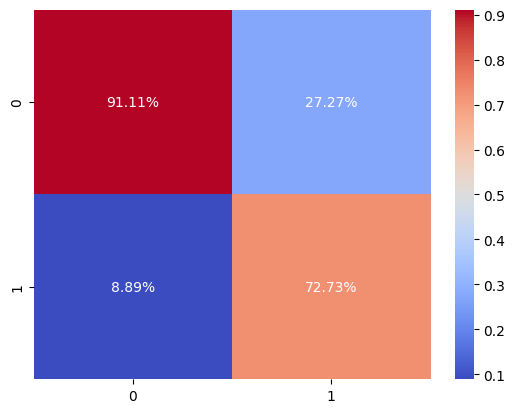

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 0.01, 15)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

In [ ]:
S3_result = metrics

### **S3 (88% vs 12%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7200497512437811
CPU times: user 49.2 s, sys: 0 ns, total: 49.2 s
Wall time: 52 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'n_estimators': 955}
ROC AUC: 0.781561876247505
Accuracy: 0.8743455497382199
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 1h 10min 20s, sys: 4.82 s, total: 1h 10min 25s
Wall time: 1h 10min 55s


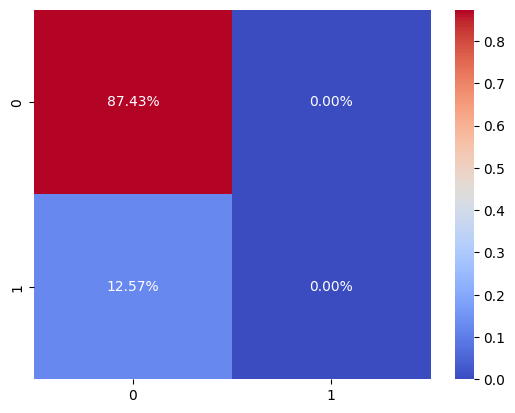

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(800, 1000, 10).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']

# Addestro il modello con il miglior parametro
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / (float(np.sum(cf_matrix[:,j])) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (88% vs 12%) 3. Naive Bayes**

Il modello Naive Bayes prende come input solo dati positivi, pertanto è necessario traslare i dati come segue.

In [ ]:
s = np.zeros(1)
X_bayes = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)
    temp = temp - np.min(temp)

    s = np.append(s, temp)

  X_bayes = np.vstack((X_bayes, s[1:]))
  s = np.zeros(1)


X_bayes = X_bayes[1:,:]
y_bayes = df.condition.to_numpy()

In [ ]:
print(X_bayes.shape, y_bayes.shape)

(1189, 2808) (1189,)


In [ ]:
# Suddivisione del dataset in set di training e test
X_bayes_train, X_bayes_test, y_bayes_train, y_bayes_test = train_test_split(X_bayes, y_bayes, test_size = 0.2, random_state = 42, stratify = y_bayes)

# Suddivisione del dataset in set di training e validazione
X_bayes_train_original, X_bayes_val, y_bayes_train_original, y_bayes_val = train_test_split(X_bayes_train, y_bayes_train, test_size = 0.2, random_state = 42, stratify = y_bayes_train)

In [ ]:
X_bayes_train = X_bayes_train_original
y_bayes_train = y_bayes_train_original

#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.7593977084275593


Migliori parametri: {'alpha': 1e-08}
ROC AUC: 0.7881736526946108
Accuracy: 0.7643979057591623
F1-score: 0.3835616438356164
Precision: 0.2857142857142857
Recall: 0.5833333333333334
CPU times: user 2min 3s, sys: 1min 1s, total: 3min 5s
Wall time: 1min 47s


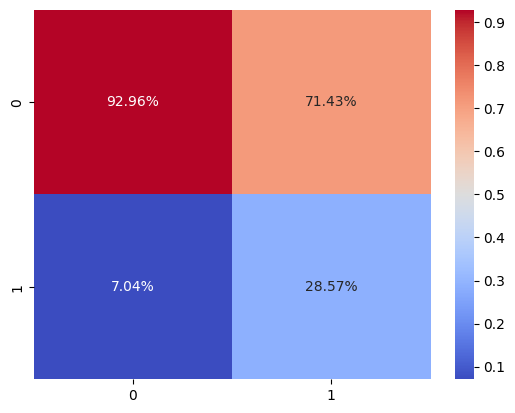

In [ ]:
%%time
# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha =  grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Complement NB*

In [ ]:
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.7593219508518017


Migliori parametri: {'alpha': 1e-08}
ROC AUC: 0.7876746506986028
Accuracy: 0.7486910994764397
F1-score: 0.3846153846153846
Precision: 0.2777777777777778
Recall: 0.625
CPU times: user 2min 4s, sys: 1min 1s, total: 3min 6s
Wall time: 1min 49s


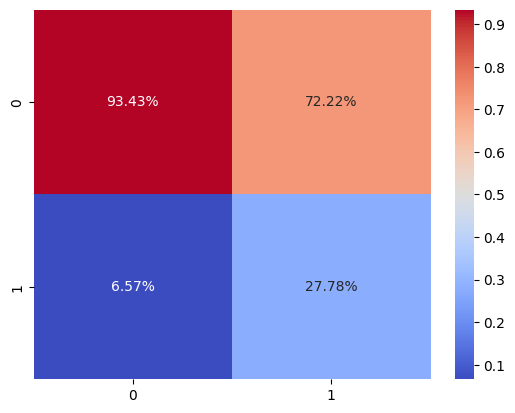

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (88% vs 12%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8088632594602745


Migliori parametri: {'C': 0.009805102040816326}
ROC AUC: 0.842564870259481
Accuracy: 0.8534031413612565
F1-score: 0.3636363636363636
Precision: 0.4
Recall: 0.3333333333333333
CPU times: user 10min 32s, sys: 441 ms, total: 10min 32s
Wall time: 10min 34s


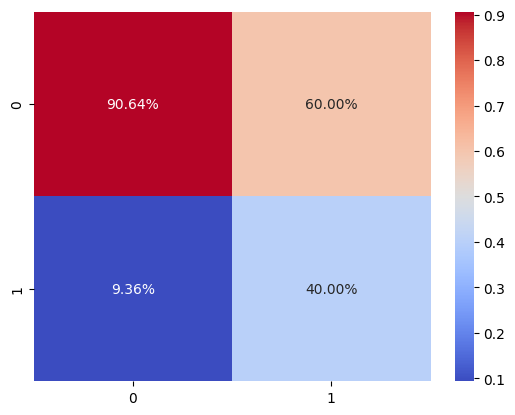

In [ ]:
%%time
parameters = {'C': np.linspace(1e-5, 0.12, 50)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Polinomiale*

In [ ]:
%%time
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7467081260364843
CPU times: user 33.9 s, sys: 26.6 ms, total: 33.9 s
Wall time: 34.1 s


In [ ]:
np.linspace(0.01, 3, 11)

array([0.01 , 0.309, 0.608, 0.907, 1.206, 1.505, 1.804, 2.103, 2.402,
       2.701, 3.   ])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 1.6800000000000002, 'degree': 3}
ROC AUC: 0.7879241516966068
Accuracy: 0.8743455497382199
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 16min 43s, sys: 708 ms, total: 16min 43s
Wall time: 16min 48s


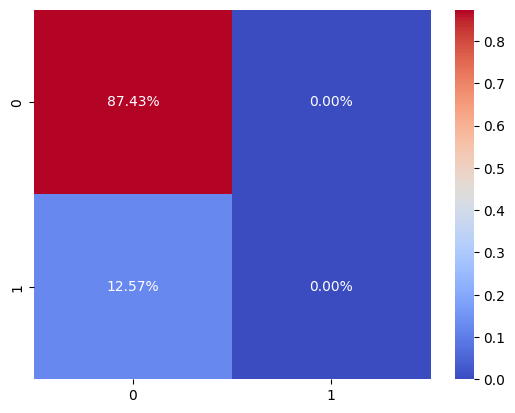

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.03, 3, 10)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])+ 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
%%time
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8342657922508669
CPU times: user 31.3 s, sys: 26.1 ms, total: 31.3 s
Wall time: 31.4 s


Migliori parametri: {'C': 2.6315789473684212}
ROC AUC: 0.8837325349301397
Accuracy: 0.900523560209424
F1-score: 0.3448275862068966
Precision: 1.0
Recall: 0.20833333333333334
CPU times: user 11min 51s, sys: 448 ms, total: 11min 52s
Wall time: 11min 55s


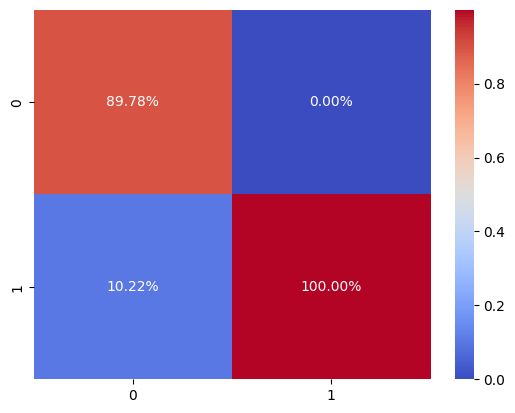

In [ ]:
%%time
parameters = {'C': np.linspace(2, 5, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (88% vs 12%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8176624453490124
CPU times: user 4min 8s, sys: 19.7 s, total: 4min 28s
Wall time: 2min 42s


Migliori parametri: {'shrinkage': 0.66625}
ROC AUC: 0.8807385229540918
Accuracy: 0.8691099476439791
F1-score: 0.5283018867924529
Precision: 0.4827586206896552
Recall: 0.5833333333333334
CPU times: user 18min 43s, sys: 1min 19s, total: 20min 3s
Wall time: 11min 54s


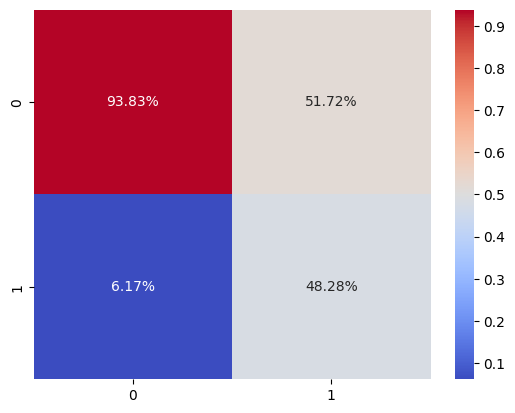

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(0.555, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

# Paziente S3 - dati unbalanced (70% vs 30%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  69.9367088607595 % e quella di T è 30.063291139240505 %. E in termini assoluti: Counter({0: 221, 1: 95})


## **Model selection**

### **S3 (70% vs 30%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.8221124286341677


Migliori parametri: {'C': 0.004091428571428571}
ROC AUC: 0.8610279441117765
Accuracy: 0.8429319371727748
F1-score: 0.46428571428571425
Precision: 0.40625
Recall: 0.5416666666666666
CPU times: user 1min 19s, sys: 31.7 s, total: 1min 51s
Wall time: 1min 8s


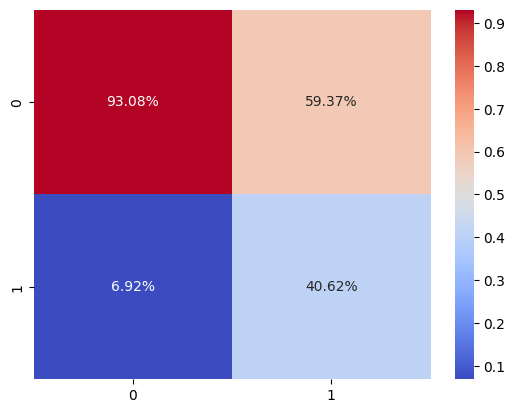

In [ ]:
%%time
parameters = {'C': np.linspace(1e-5, 0.2, 50)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S3_result = np.vstack((S3_result, metrics))

### **S3 (70% vs 30%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7744301712779975
CPU times: user 9.26 s, sys: 17.2 ms, total: 9.28 s
Wall time: 9.29 s


Migliori parametri: {'n_estimators': 800}
ROC AUC: 0.8534181636726547
Accuracy: 0.8900523560209425
F1-score: 0.2222222222222222
Precision: 1.0
Recall: 0.125
CPU times: user 6min 58s, sys: 601 ms, total: 6min 59s
Wall time: 7min 1s


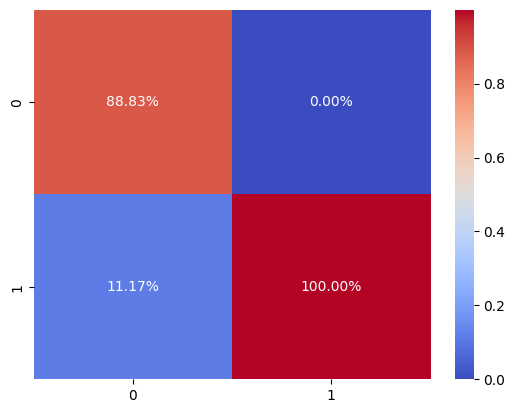

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(700, 900, 5).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (70% vs 30%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  69.9367088607595 % e quella di T è 30.063291139240505 %. E in termini assoluti: Counter({0: 221, 1: 95})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.7525647782169521
CPU times: user 114 ms, sys: 58.7 ms, total: 172 ms
Wall time: 97.9 ms


Migliori parametri: {'alpha': 3.937226329963479}
ROC AUC: 0.7644710578842315
Accuracy: 0.7172774869109948
F1-score: 0.37209302325581395
Precision: 0.25806451612903225
Recall: 0.6666666666666666
CPU times: user 55.1 s, sys: 33.2 s, total: 1min 28s
Wall time: 51.4 s


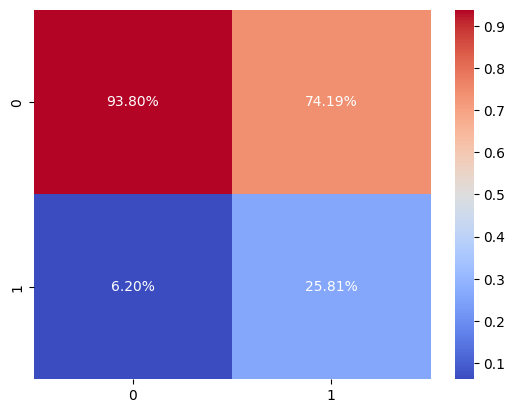

In [ ]:
%%time
# GridSearchCV
parameters = {'alpha': np.logspace(-2, 3, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

best_alpha_M = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB = MultinomialNB(alpha = best_alpha_M)
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.7532751427316645
CPU times: user 130 ms, sys: 87.8 ms, total: 218 ms
Wall time: 174 ms


Migliori parametri: {'alpha': 3.865221162631262}
ROC AUC: 0.7644710578842315
Accuracy: 0.6910994764397905
F1-score: 0.3516483516483516
Precision: 0.23880597014925373
Recall: 0.6666666666666666
CPU times: user 58.3 s, sys: 34.6 s, total: 1min 32s
Wall time: 56 s


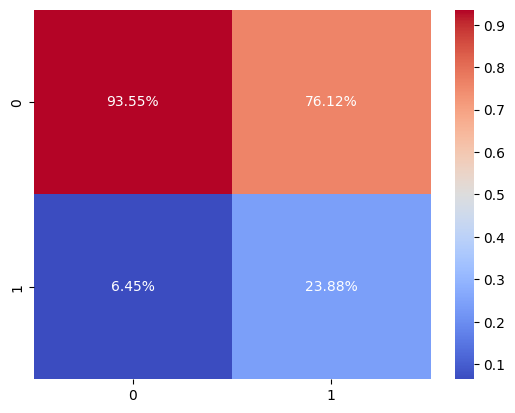

In [ ]:
%%time
parameters = {'alpha': np.logspace(-1, 3, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (70% vs 30%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8127119016249452


Migliori parametri: {'C': 0.00203010101010101}
ROC AUC: 0.846931137724551
Accuracy: 0.7853403141361257
F1-score: 0.4225352112676056
Precision: 0.3191489361702128
Recall: 0.625
CPU times: user 6min 47s, sys: 364 ms, total: 6min 48s
Wall time: 6min 50s


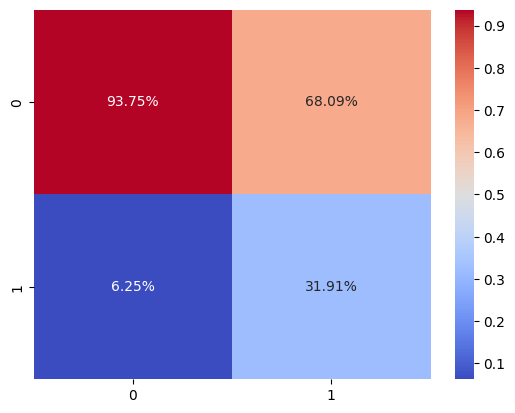

In [ ]:
%%time
parameters = {'C': np.linspace(1e-5, 0.2, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7716864295125165


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 1.593157894736842, 'degree': 3}
ROC AUC: 0.7784431137724551
Accuracy: 0.8743455497382199
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 4min 47s, sys: 239 ms, total: 4min 48s
Wall time: 4min 49s


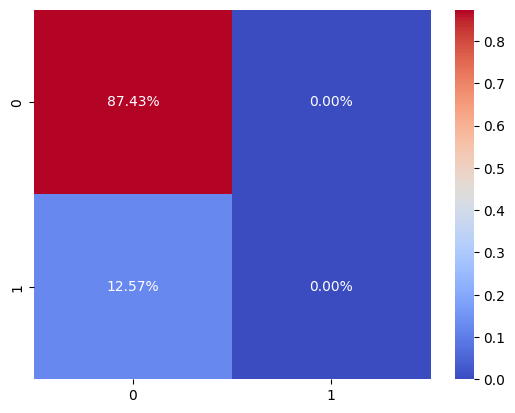

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.03, 3, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8252986385595081


Migliori parametri: {'C': 2.6842105263157894}
ROC AUC: 0.8832335329341316
Accuracy: 0.8900523560209425
F1-score: 0.5116279069767442
Precision: 0.5789473684210527
Recall: 0.4583333333333333
CPU times: user 1min 55s, sys: 122 ms, total: 1min 55s
Wall time: 1min 56s


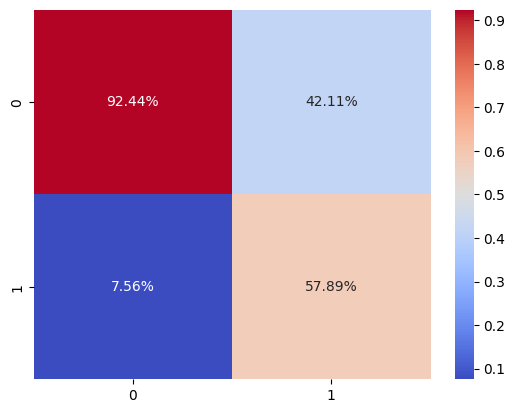

In [ ]:
%%time
parameters = {'C': np.linspace(1, 5, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (70% vs 30%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8076833552920508
CPU times: user 3min 43s, sys: 17.8 s, total: 4min 1s
Wall time: 2min 24s


Migliori parametri: {'shrinkage': 0.9425}
ROC AUC: 0.872255489021956
Accuracy: 0.8010471204188482
F1-score: 0.5
Precision: 0.36538461538461536
Recall: 0.7916666666666666
CPU times: user 17min 27s, sys: 1min 18s, total: 18min 46s
Wall time: 11min 7s


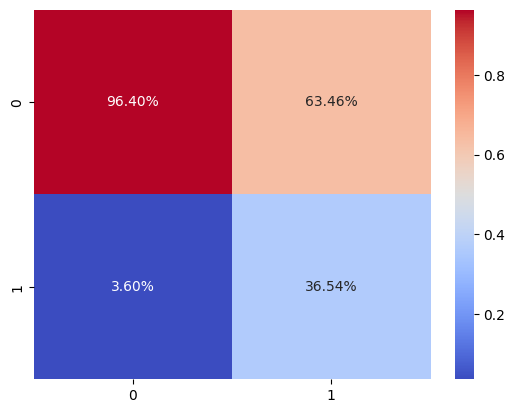

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(0.77, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

In [ ]:
S3_result.shape

(16, 5)

# Paziente S3 - dati unbalanced (60% vs 40%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  59.91561181434599 % e quella di T è 40.08438818565401 %. E in termini assoluti: Counter({0: 142, 1: 95})


## **Model selection**

### **S3 (60% vs 40%) 1. Logistic Regression**

In [ ]:
%%time
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.7856613756613756
CPU times: user 1.61 s, sys: 643 ms, total: 2.25 s
Wall time: 1.21 s


Migliori parametri: {'C': 0.002119191919191919}
ROC AUC: 0.8640219560878244
Accuracy: 0.8219895287958116
F1-score: 0.5
Precision: 0.38636363636363635
Recall: 0.7083333333333334
CPU times: user 1min 59s, sys: 53.7 s, total: 2min 52s
Wall time: 1min 42s


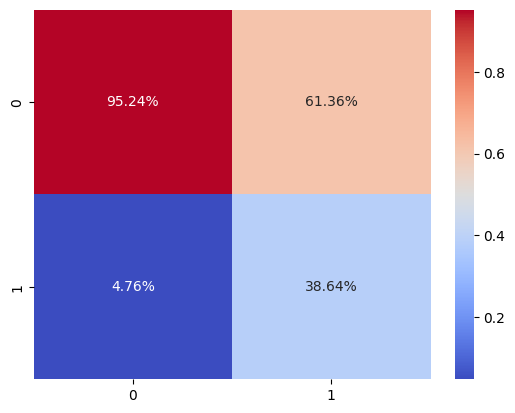

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 0.2, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S3_result = np.vstack((S3_result, metrics))

### **S3 (60% vs 40%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.758015873015873
CPU times: user 6.36 s, sys: 12.3 ms, total: 6.37 s
Wall time: 6.41 s


Migliori parametri: {'n_estimators': 866}
ROC AUC: 0.8616516966067864
Accuracy: 0.8638743455497382
F1-score: 0.4090909090909091
Precision: 0.45
Recall: 0.375
CPU times: user 10min 10s, sys: 1.14 s, total: 10min 11s
Wall time: 10min 14s


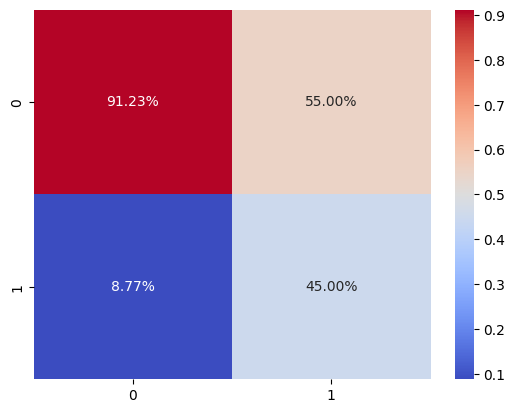

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(800, 1000, 10).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (60% vs 40%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  59.91561181434599 % e quella di T è 40.08438818565401 %. E in termini assoluti: Counter({0: 142, 1: 95})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.733505291005291
CPU times: user 116 ms, sys: 75.8 ms, total: 192 ms
Wall time: 111 ms


Migliori parametri: {'alpha': 15.148189222583458}
ROC AUC: 0.7738273453093812
Accuracy: 0.6910994764397905
F1-score: 0.40404040404040403
Precision: 0.26666666666666666
Recall: 0.8333333333333334
CPU times: user 51.6 s, sys: 30.8 s, total: 1min 22s
Wall time: 48.7 s


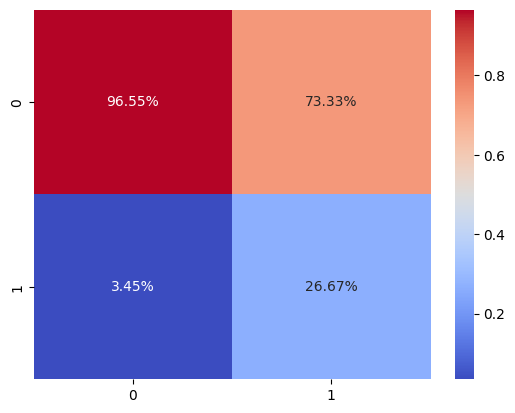

In [ ]:
%%time
# GridSearchCV
parameters = {'alpha': np.logspace(-1, 3, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.733505291005291
CPU times: user 104 ms, sys: 60.9 ms, total: 165 ms
Wall time: 92.3 ms


Migliori parametri: {'alpha': 15.148189222583458}
ROC AUC: 0.7730788423153693
Accuracy: 0.6701570680628273
F1-score: 0.3883495145631068
Precision: 0.25316455696202533
Recall: 0.8333333333333334
CPU times: user 50.6 s, sys: 30.2 s, total: 1min 20s
Wall time: 46.2 s


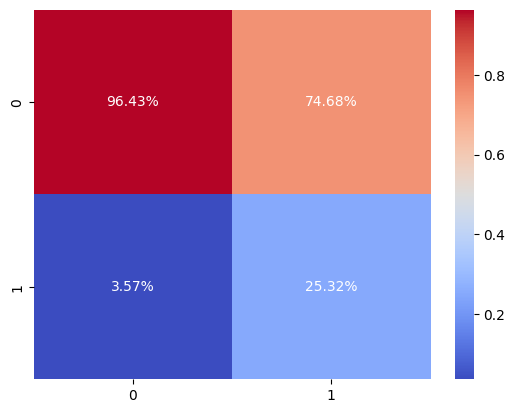

In [ ]:
%%time

parameters = {'alpha': np.logspace(-1, 3, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (60% vs 40%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7825396825396825


In [ ]:
np.linspace(0.001, 0.02, 4)

array([0.001     , 0.00733333, 0.01366667, 0.02      ])

Migliori parametri: {'C': 0.00203010101010101}
ROC AUC: 0.8330838323353293
Accuracy: 0.7853403141361257
F1-score: 0.43835616438356156
Precision: 0.32653061224489793
Recall: 0.6666666666666666
CPU times: user 4min 13s, sys: 189 ms, total: 4min 13s
Wall time: 4min 14s


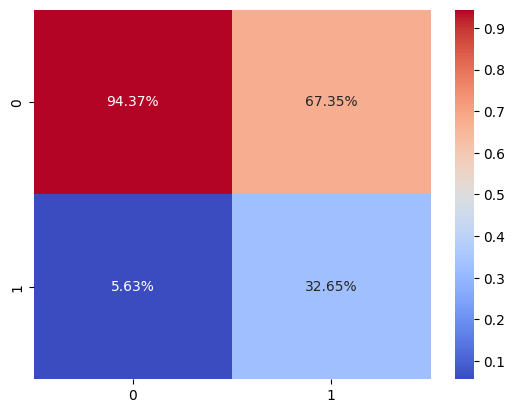

In [ ]:
%%time
parameters = {'C': np.linspace(1e-5, 0.2, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7474867724867724


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 1.3231578947368423, 'degree': 3}
ROC AUC: 0.7652195608782435
Accuracy: 0.8743455497382199
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 2min 47s, sys: 171 ms, total: 2min 47s
Wall time: 2min 48s


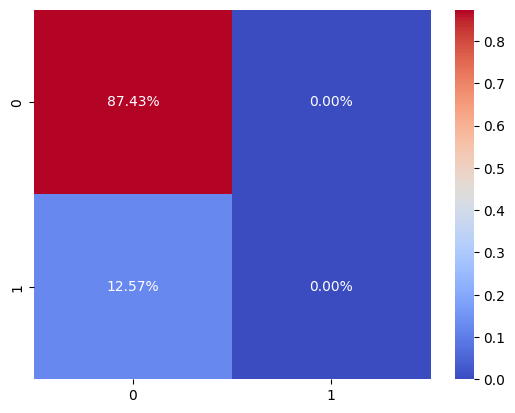

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:

svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8124603174603177


Migliori parametri: {'C': 1.631578947368421}
ROC AUC: 0.876746506986028
Accuracy: 0.8272251308900523
F1-score: 0.5074626865671642
Precision: 0.3953488372093023
Recall: 0.7083333333333334
CPU times: user 1min 6s, sys: 78.3 ms, total: 1min 7s
Wall time: 1min 7s


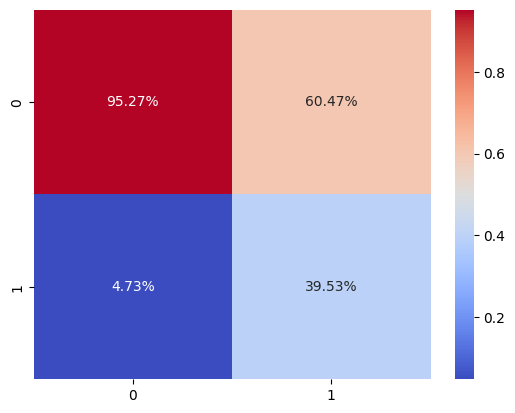

In [ ]:
%%time
parameters = {'C': np.linspace(1, 5, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (60% vs 40%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7873015873015873


Migliori parametri: {'shrinkage': 0.7500000025}
ROC AUC: 0.8605289421157685
Accuracy: 0.7591623036649214
F1-score: 0.4390243902439025
Precision: 0.3103448275862069
Recall: 0.75
CPU times: user 18min 8s, sys: 1min 19s, total: 19min 28s
Wall time: 11min 29s


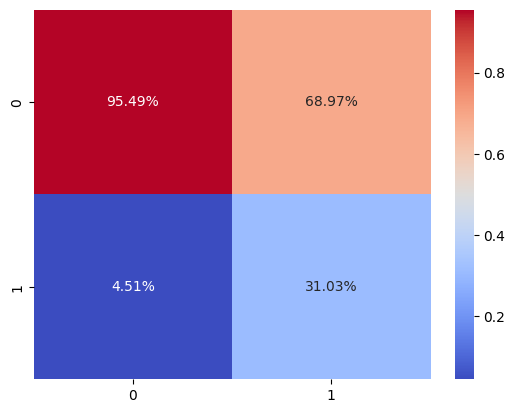

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

In [ ]:
S3_result.shape

(24, 5)

# Paziente S3 - dati unbalanced (50% vs 50%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 95, 1: 95})


## **Model selection**

### **S3 (50% vs 50%) 1. Logistic Regression**

In [ ]:
%%time

LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'f1')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.6762504299965599
CPU times: user 1.24 s, sys: 543 ms, total: 1.78 s
Wall time: 944 ms


Migliori parametri: {'C': 0.001}
ROC AUC: 0.8592814371257484
Accuracy: 0.7486910994764397
F1-score: 0.4666666666666667
Precision: 0.3181818181818182
Recall: 0.875
CPU times: user 1min 53s, sys: 54.7 s, total: 2min 48s
Wall time: 1min 39s


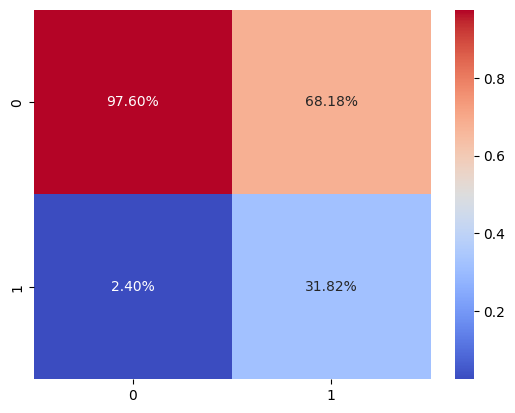

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 10, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S3_result = np.vstack((S3_result, metrics))

### **S3 (50% vs 50%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7844444444444444
CPU times: user 5.21 s, sys: 9.61 ms, total: 5.22 s
Wall time: 5.26 s


Migliori parametri: {'n_estimators': 550}
ROC AUC: 0.873003992015968
Accuracy: 0.7120418848167539
F1-score: 0.4444444444444445
Precision: 0.29333333333333333
Recall: 0.9166666666666666
CPU times: user 15min 54s, sys: 1.88 s, total: 15min 56s
Wall time: 16min


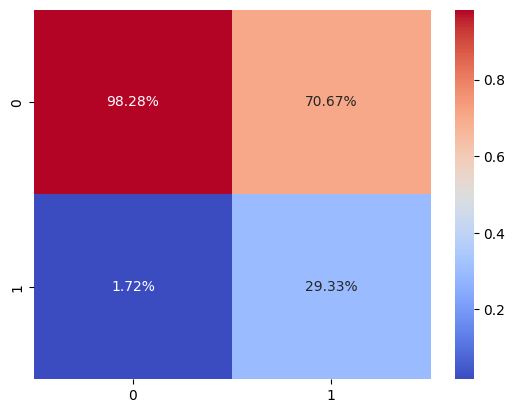

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 1000, 29).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (50% vs 50%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 95, 1: 95})


#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.7044444444444444


Migliori parametri: {'alpha': 1413.5155848353957}
ROC AUC: 0.751746506986028
Accuracy: 0.5235602094240838
F1-score: 0.3259259259259259
Precision: 0.1981981981981982
Recall: 0.9166666666666666
CPU times: user 46.9 s, sys: 28.8 s, total: 1min 15s
Wall time: 43.7 s


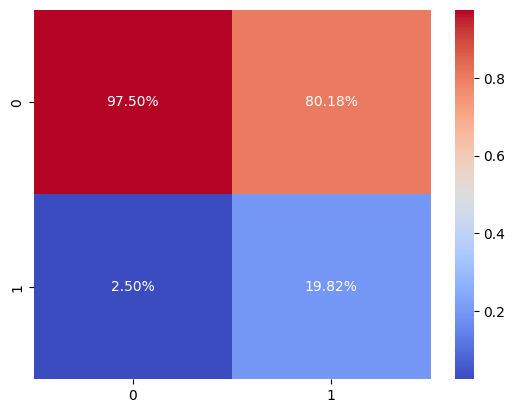

In [ ]:
%%time

# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Complement NB*

In [ ]:
%%time

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.7033333333333334
CPU times: user 95.1 ms, sys: 52.8 ms, total: 148 ms
Wall time: 87.2 ms


Migliori parametri: {'alpha': 1413.5155848353957}
ROC AUC: 0.751746506986028
Accuracy: 0.5235602094240838
F1-score: 0.3259259259259259
Precision: 0.1981981981981982
Recall: 0.9166666666666666
CPU times: user 48.5 s, sys: 29.6 s, total: 1min 18s
Wall time: 44.9 s


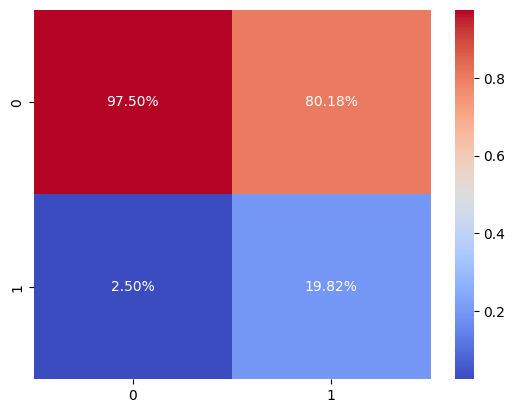

In [ ]:
%%time
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (50% vs 50%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.6866666666666666


Migliori parametri: {'C': 0.0001}
ROC AUC: 0.8365768463073853
Accuracy: 0.6701570680628273
F1-score: 0.39999999999999997
Precision: 0.25925925925925924
Recall: 0.875
CPU times: user 2min 51s, sys: 159 ms, total: 2min 51s
Wall time: 2min 52s


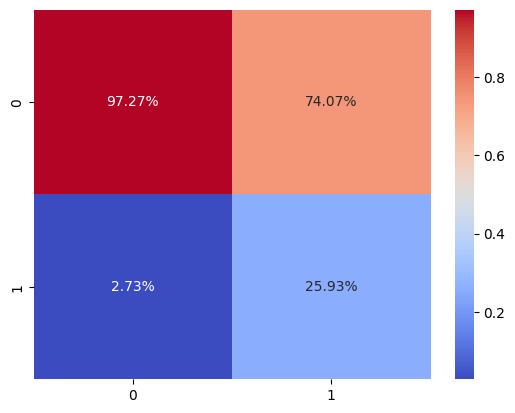

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 10, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.72


Migliori parametri: {'C': 1.0605263157894738, 'degree': 3}
ROC AUC: 0.7637225548902196
Accuracy: 0.6649214659685864
F1-score: 0.36
Precision: 0.23684210526315788
Recall: 0.75
CPU times: user 1min 48s, sys: 93.3 ms, total: 1min 48s
Wall time: 1min 49s


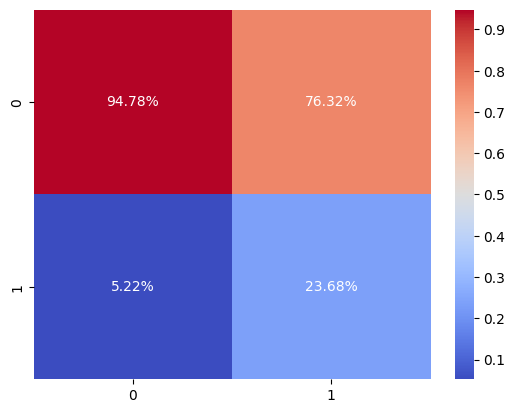

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.76


Migliori parametri: {'C': 1.9473684210526314}
ROC AUC: 0.8690119760479043
Accuracy: 0.743455497382199
F1-score: 0.4615384615384615
Precision: 0.31343283582089554
Recall: 0.875
CPU times: user 44.1 s, sys: 72.3 ms, total: 44.2 s
Wall time: 44.3 s


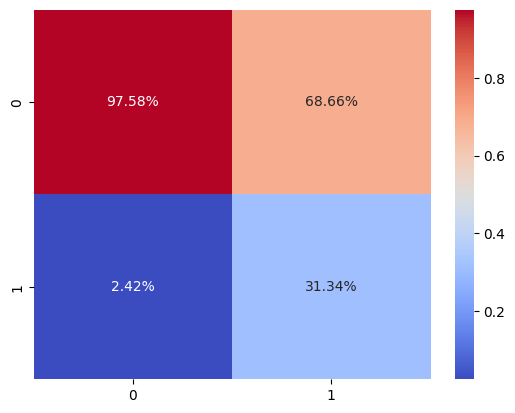

In [ ]:
%%time
parameters = {'C': np.linspace(1, 10, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

### **S3 (50% vs 50%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7377777777777779


In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S3_result = np.vstack((S3_result, metrics))

In [ ]:
S3_result.shape

# Salvataggio risultati per il paziente

In [ ]:
path_data = '/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results'
file_path = os.path.join(path_mount, path_data, subject)
np.save(file_path + "_results", S3_result)
print(file_path)